In [61]:
#考核项目04：奥运运动员关系数据分析及结果展示

In [62]:
# 导入所需模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir(r'C:\Users\Vodka\Desktop\考核项目04_多场景下的图表可视化表达')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') 
#图片保存路径，设置单独文件夹
pic = r'C:\Users\Vodka\Desktop\考核项目04_多场景下的图表可视化表达\pic'

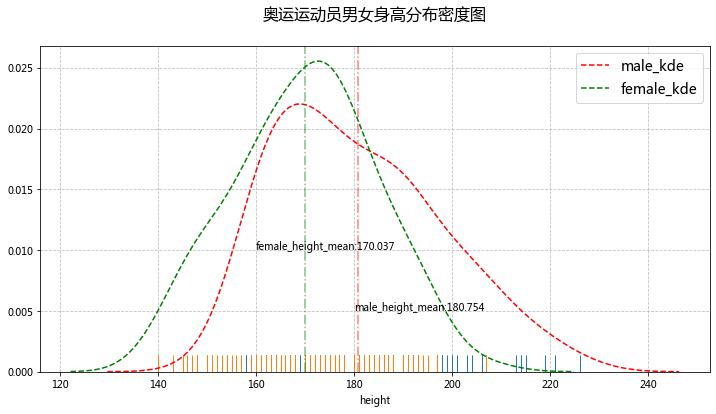

In [63]:
# 1.分男女分别分析运动员的身高分布，并制作图表
# 读取数据，提取性别和身高
data1 = pd.read_excel('奥运运动员数据.xlsx',sheetname = '运动员信息')
data1_height = data1[['gender','height']]
data1_height.dropna(inplace = True)
# 计算男女身高及平均值
male_height_mean = data1_height[data1_height['gender'] == '男'].mean()
female_height_mean = data1_height[data1_height['gender'] == '女'].mean()
male_height = data1_height[data1_height['gender'] == '男']
female_height = data1_height[data1_height['gender'] == '女']

# 根据性别绘制分布密度图
plt.figure(figsize = (12,6))
#男性身高分布密度图
sns.distplot(male_height['height'],kde = True,
             norm_hist=True,hist = False,rug = True,
             kde_kws = {'color':'red','linestyle':'--','label':'male_kde'})
#女性身高分布密度图
sns.distplot(female_height['height'],kde = True,
             norm_hist=True,hist = False,rug = True,
             kde_kws = {'color':'green','linestyle':'--','label':'female_kde'})
#绘制辅助线，分别别男女平均身高
plt.axvline(male_height_mean.values,color = 'red',linestyle = '-.',alpha = 0.5)
plt.axvline(female_height_mean.values,color = 'green',linestyle = '-.',alpha = 0.5)
#其他参数设置，标题，网格和图例，并保存图片
plt.text(180,0.005,'male_height_mean:180.754')
plt.text(160,0.01,'female_height_mean:170.037')
plt.grid(True,linestyle = '--',alpha = 0.8)
plt.legend(loc = 'best',fontsize = 14)
plt.title('奥运运动员男女身高分布密度图\n',fontsize = 16)
plt.savefig(pic + '\分布密度图.png')

In [64]:
# 2.综合指标判断运动员的身材，并找到TOP8的运动员，并制作图表
#提取所需字段
data2 = data1[['name','age','height','weight','arm','leg']]
data2.dropna(inplace=True)    #删除缺失值
#计算各指数并初步筛选
data2['bmi'] = data2['weight'] / (data2['height'] /100)**2
data2['leg/height'] = data2['leg'] / data2['height']
data2['arm/height'] = data2['arm'] / data2['height']
data2['leg/height'] = data2['leg/height'][data2['leg/height'] < 0.7]
data2['arm/height'] = data2['arm/height'][data2['arm/height'] > 0.7]
#编写标准化函数
def norm(data,col):
    dmin = data[col].min()
    dmax = data[col].max()
    return (data[col] - dmin) / (dmax - dmin)
#生成标准化后的的数据
data2['bmi_norm'] = norm(data2,'bmi')
data2['arm/height_norm'] = norm(data2,'arm/height')
data2['leg/height_norm'] = norm(data2,'leg/height')
data2['age_norm'] = norm(data2,'age')
data2['score'] = (data2['bmi_norm'] + data2['arm/height_norm'] + data2['leg/height_norm'] + data2['age_norm'])/4 
data2.head()

,name,age,height,weight,arm,leg,bmi,leg/height,arm/height,bmi_norm,arm/height_norm,leg/height_norm,age_norm,score
0,雷声,32.0,193,75.0,194.0,110.0,20.134769,0.569948,1.005181,0.207684,0.548671,0.689620,0.666667,0.528160
2,仲满,33.0,190,76.0,194.0,114.0,21.052632,0.600000,1.021053,0.240275,0.607156,0.863291,0.708333,0.604764
3,孙一文,24.0,176,65.0,173.0,95.0,20.983988,0.539773,0.982955,0.237837,0.466765,0.515234,0.333333,0.388293
4,郝佳露,29.0,174,66.0,173.0,94.0,21.799445,0.540230,0.994253,0.266792,0.508399,0.517876,0.541667,0.458684
5,李娜,35.0,177,68.0,175.0,97.0,21.705129,0.548023,0.988701,0.263443,0.487939,0.562911,0.791667,0.526490


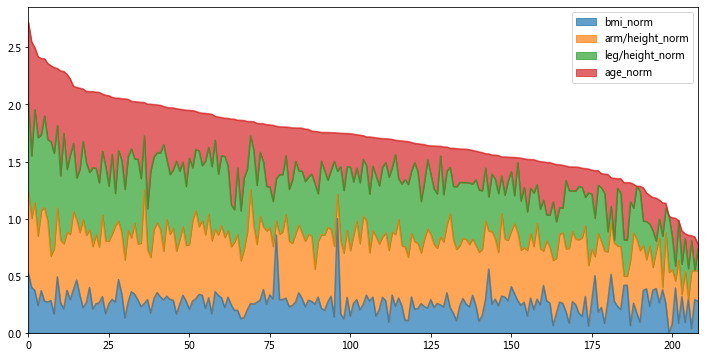

In [65]:
# 绘制各指数堆叠面积图
data2_area = data2[['bmi_norm','arm/height_norm',
                    'leg/height_norm','age_norm','score']]
data2_area.dropna(inplace = True)
data2_area.sort_values('score',ascending=False,inplace=True)
data2_area.reset_index(inplace=True)
del data2_area['index']
data2_area.plot.area(y = ['bmi_norm','arm/height_norm','leg/height_norm','age_norm'],
               stacked = True,figsize = (12,6),alpha = 0.7)
plt.savefig(pic + '\堆叠面积图.png')

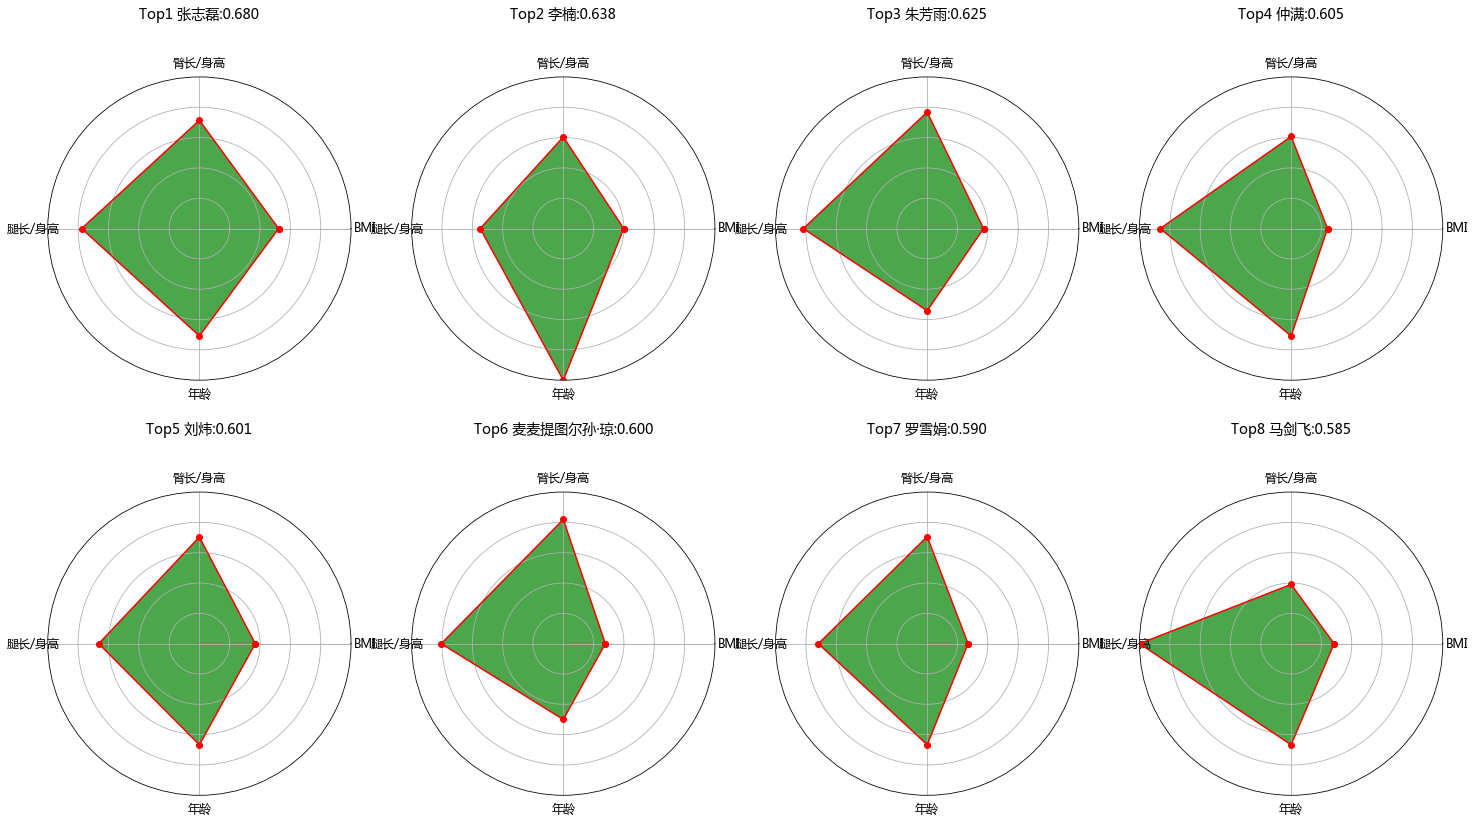

In [66]:
# 绘制Top8雷达图
#提取前8名运动员数据
data2_ld = data2.sort_values('score',ascending=False)[:8]
data2_ld = data2_ld[['name','bmi_norm','arm/height_norm','leg/height_norm','age_norm','score']]
data2_ld.index = data2_ld['name']
del data2_ld['name']
data2_ld.columns = ['BMI','臂长/身高','腿长/身高','年龄','score']
plt.subplots(2,4,figsize = (25,14))
#字段中含有‘score’,故只提取前四项
name = data2_ld.columns.tolist()[0:4]
#编写for循环语句绘制雷达图
for n in range(8):
    datan = data2_ld.iloc[n][:-1]
    length = len(datan)
    theta = np.linspace(0,2*np.pi,length,endpoint=False)
    theta = np.concatenate((theta,[theta[0]]))
    datan = np.concatenate((datan,[datan[0]]))
    m = int(str(24)+ str(n+1))
    ax = plt.subplot(m,projection = 'polar')
    ax.set_ylim(0,1)
    ax.plot(theta,datan,'-ro')
    ax.fill(theta,datan,'g',alpha = 0.7)
    ax.set_thetagrids(theta*180/np.pi,name,fontsize = 12)
    ax.set_rgrids(np.arange(0.2,1,0.2),'')
    ax.set_title('Top%s %s:%.3f\n\n'%(n+1,data2_ld.iloc[n].name,data2_ld.iloc[n]['score']),fontsize = 14)
plt.savefig(pic + '\Top8雷达图.png')

In [67]:
# 3.根据运动员CP数据，分析出CP综合热度，通过python处理数据并导出，在Gephi中绘制图表
#读取数据处理缺失值为0
data3 = pd.read_excel('奥运运动员数据.xlsx',sheetname = '运动员CP热度')
colnames = ['cp微博数量','cp微博话题阅读量','B站cp视频播放量']
data3.replace('无数据',0,inplace = True)
data3.fillna(0,inplace = True)
#用之前编写的标准化函数处理数据
data3['cp微博数量_norm'] = norm(data3,'cp微博数量')
data3['cp微博话题阅读量_norm'] = norm(data3,'cp微博话题阅读量')
data3['B站cp视频播放量_norm'] = norm(data3,'B站cp视频播放量')
#计算最终得分（加权平均）
data3['score'] = data3['cp微博数量_norm'] * 0.5 + \
                data3['cp微博话题阅读量_norm'] * 0.3 + \
                data3['B站cp视频播放量_norm'] * 0.2
data3.sort_values('score',ascending = False,inplace=True)
#提取绘制Gephi图所需数据，并修改列名，保存为‘.xlsx’格式
data3_gephi = data3[['p1','p2','p2来源','score']]
data3_gephi.columns = ['target','source','type','weight']
writer = pd.ExcelWriter('运动员关系表.xlsx')
data3_gephi.to_excel(writer,'sheet1')
writer.save()
#后续操作在软件Gephi中进行